In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv'
df = pd.read_csv(url)
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


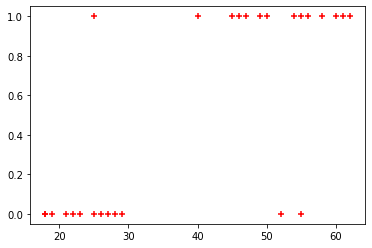

In [3]:
plt.scatter(df['age'], df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.2)
y_train

1     0
11    0
25    1
9     1
7     1
3     0
24    1
5     1
26    0
2     1
20    0
14    1
21    0
12    0
10    0
8     1
19    0
16    1
13    0
4     1
23    1
Name: bought_insurance, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()

In [7]:
l_model.fit(X_train, y_train)

LogisticRegression()

In [8]:
X_test

,age
22,40
0,22
18,19
15,55
6,55
17,58


In [9]:
l_model.predict(X_test)

array([1, 0, 0, 1, 1, 1], dtype=int64)

In [10]:
l_model.score(X_test, y_test)

0.8333333333333334

### Lets try it in formula of sigmoid
##### sigmoid = 1/(1+e^-z)      |    z = m*x+b



###### model.coef_ indicates value of m in y=m*x + b equation


In [11]:
l_model.coef_

array([[0.15900103]])



###### model.intercept_ indicates value of b in y=m*x + b equation


In [12]:
l_model.intercept_

array([-5.96851355])



###### Lets defined sigmoid function now and do the math with hand


In [13]:
import math
def sig(x):
    return 1/(1+math.exp(-x))

In [14]:
def cal_x(age):
    z = 0.114 * age -4.322
    y = sig(z)
    return y

In [15]:
age = 24
cal_x(age)

0.1699474133826866

## With New Dataset Practice HR_comma_sep

In [16]:
prac_url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv'
df1 = pd.read_csv(prac_url)

In [17]:
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

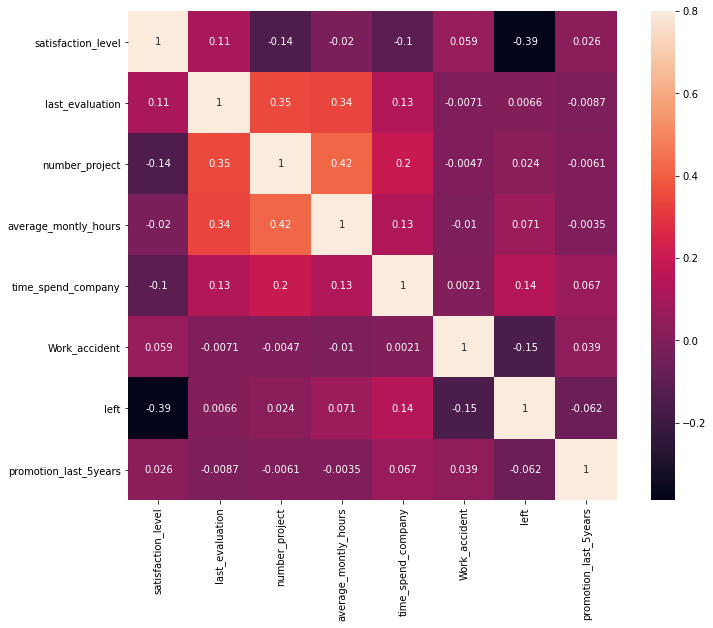

In [19]:
import seaborn as sns
cormat = df1.corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(cormat, vmax=.8, square=True,annot= True)

In [20]:
df1['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

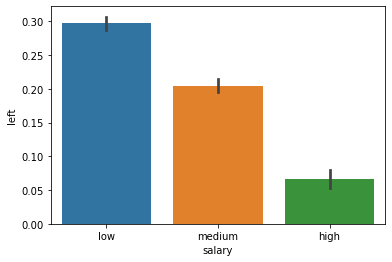

In [21]:
g = sns.barplot(x="salary",y = 'left',data=df1)
g = g.set_ylabel("left")


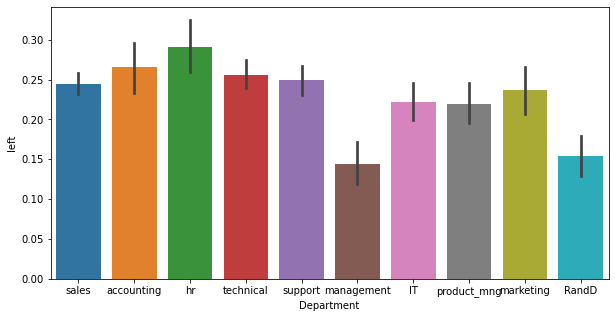

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

g = sns.barplot(x="Department",y = 'left',data=df1)
g = g.set_ylabel("left")


In [23]:
df2.left.value_counts()

NameError: name 'df2' is not defined

In [ ]:
df2.left.value_counts()/len(df2)

In [ ]:
df2.groupby('left').mean()

In [ ]:
# left = df2[df2.left==1]
# left.shape

In [ ]:
retained = df2[df2.left==0]
retained.shape

In [ ]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

In [ ]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

In [ ]:
q = pd.crosstab(df1.salary, df1.left)

q.div(q.sum(1), axis = 0).plot(kind='bar', stacked = True)
plt.show()
print(q)
print('\n')
print(q.sum(1))

In [ ]:
p1 = df1[df1.left==0].satisfaction_level.hist()
p2 = df1[df1.left==1].satisfaction_level.hist()
plt.show()

In [ ]:
merged= df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
merged.head()

#### Perform OHE

In [ ]:
# ohe = pd.get_dumies(merged.salay)
# ohe
ohe = pd.get_dummies(merged, columns = ['salary'])
ohe

In [ ]:
final = ohe.drop(['salary_high'], axis = 1)
final.head()

In [ ]:
X = final
X.head()

In [ ]:
y = df1.left
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)